<a href="https://colab.research.google.com/github/sturu1/FRI/blob/master/2020_7_20_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 예측하기

In [51]:
#python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)


In [52]:
#Scikit=Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
  #%tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  IS_COLAB = True
except Exception:
  IS_COLAB = False


In [53]:
#Tensorflow >= 2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [54]:
if not tf.config.list_physical_devices('GPU'):
  print("No")
  if IS_COLAB:
    print("GO")

#common imports
import numpy as np
import os
from pathlib import Path

#to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

No
GO


In [55]:
%matplotlib inline
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

In [56]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figur", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [57]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5) # + noise
  return series[..., np.newaxis].astype(np.float32)

In [58]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps +1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [59]:
X_train.shape, y_train.shape 

((7000, 50, 1), (7000, 1))

In [66]:

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
  plt.plot(series, ".")
  if y is not None:
    plt.plot(n_steps,y,"bx", markersize=10)
  if y_pred is not None:
    plt.plot(n_steps,y_pred,"ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps + 1, -1, 1])

Saving figur time_series_plot


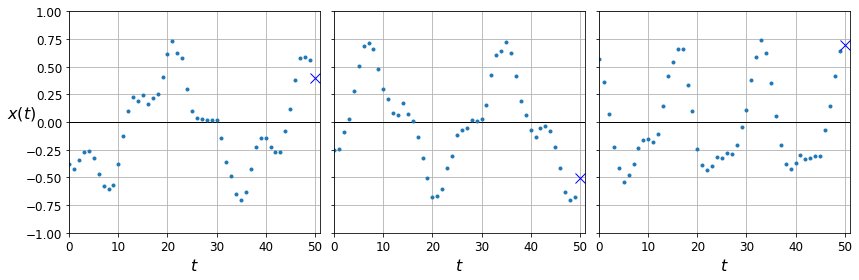

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(X_valid[col, :, 0], y_valid[col,0], y_label=("$x(t)$" if col == 0 else None))

save_fig("time_series_plot")
plt.show()